## Bike Sharing Case Study

#### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.    

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Essentially, BoomBikes company wants —
1. To identify the variables affecting the demand for these shared bikes in the American market


In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import scipy.stats as stats

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')



### STEP 1 -Reading and Understanding the Data

#### 1.1-Reading the Data

In [2]:
# Reading the Dataset

bikesharing = pd.read_csv('day.csv')


#### 1.2- Understanding the Data

In [3]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikesharing.shape

(730, 16)

In [5]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#####
<b>Observation
<b>-  No missing values in dataset - all 730 values available for each column . So no need to fill/ impute missing values in data,

In [6]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### STEP 2 -Exploratory Data Analysis 

#### 2.1.Visualising the Numerical Data

In [7]:
# visualise the data using seaborn.
# Make a pairplot of all the numerical variables present to visualise which variables are most correlated to Count.

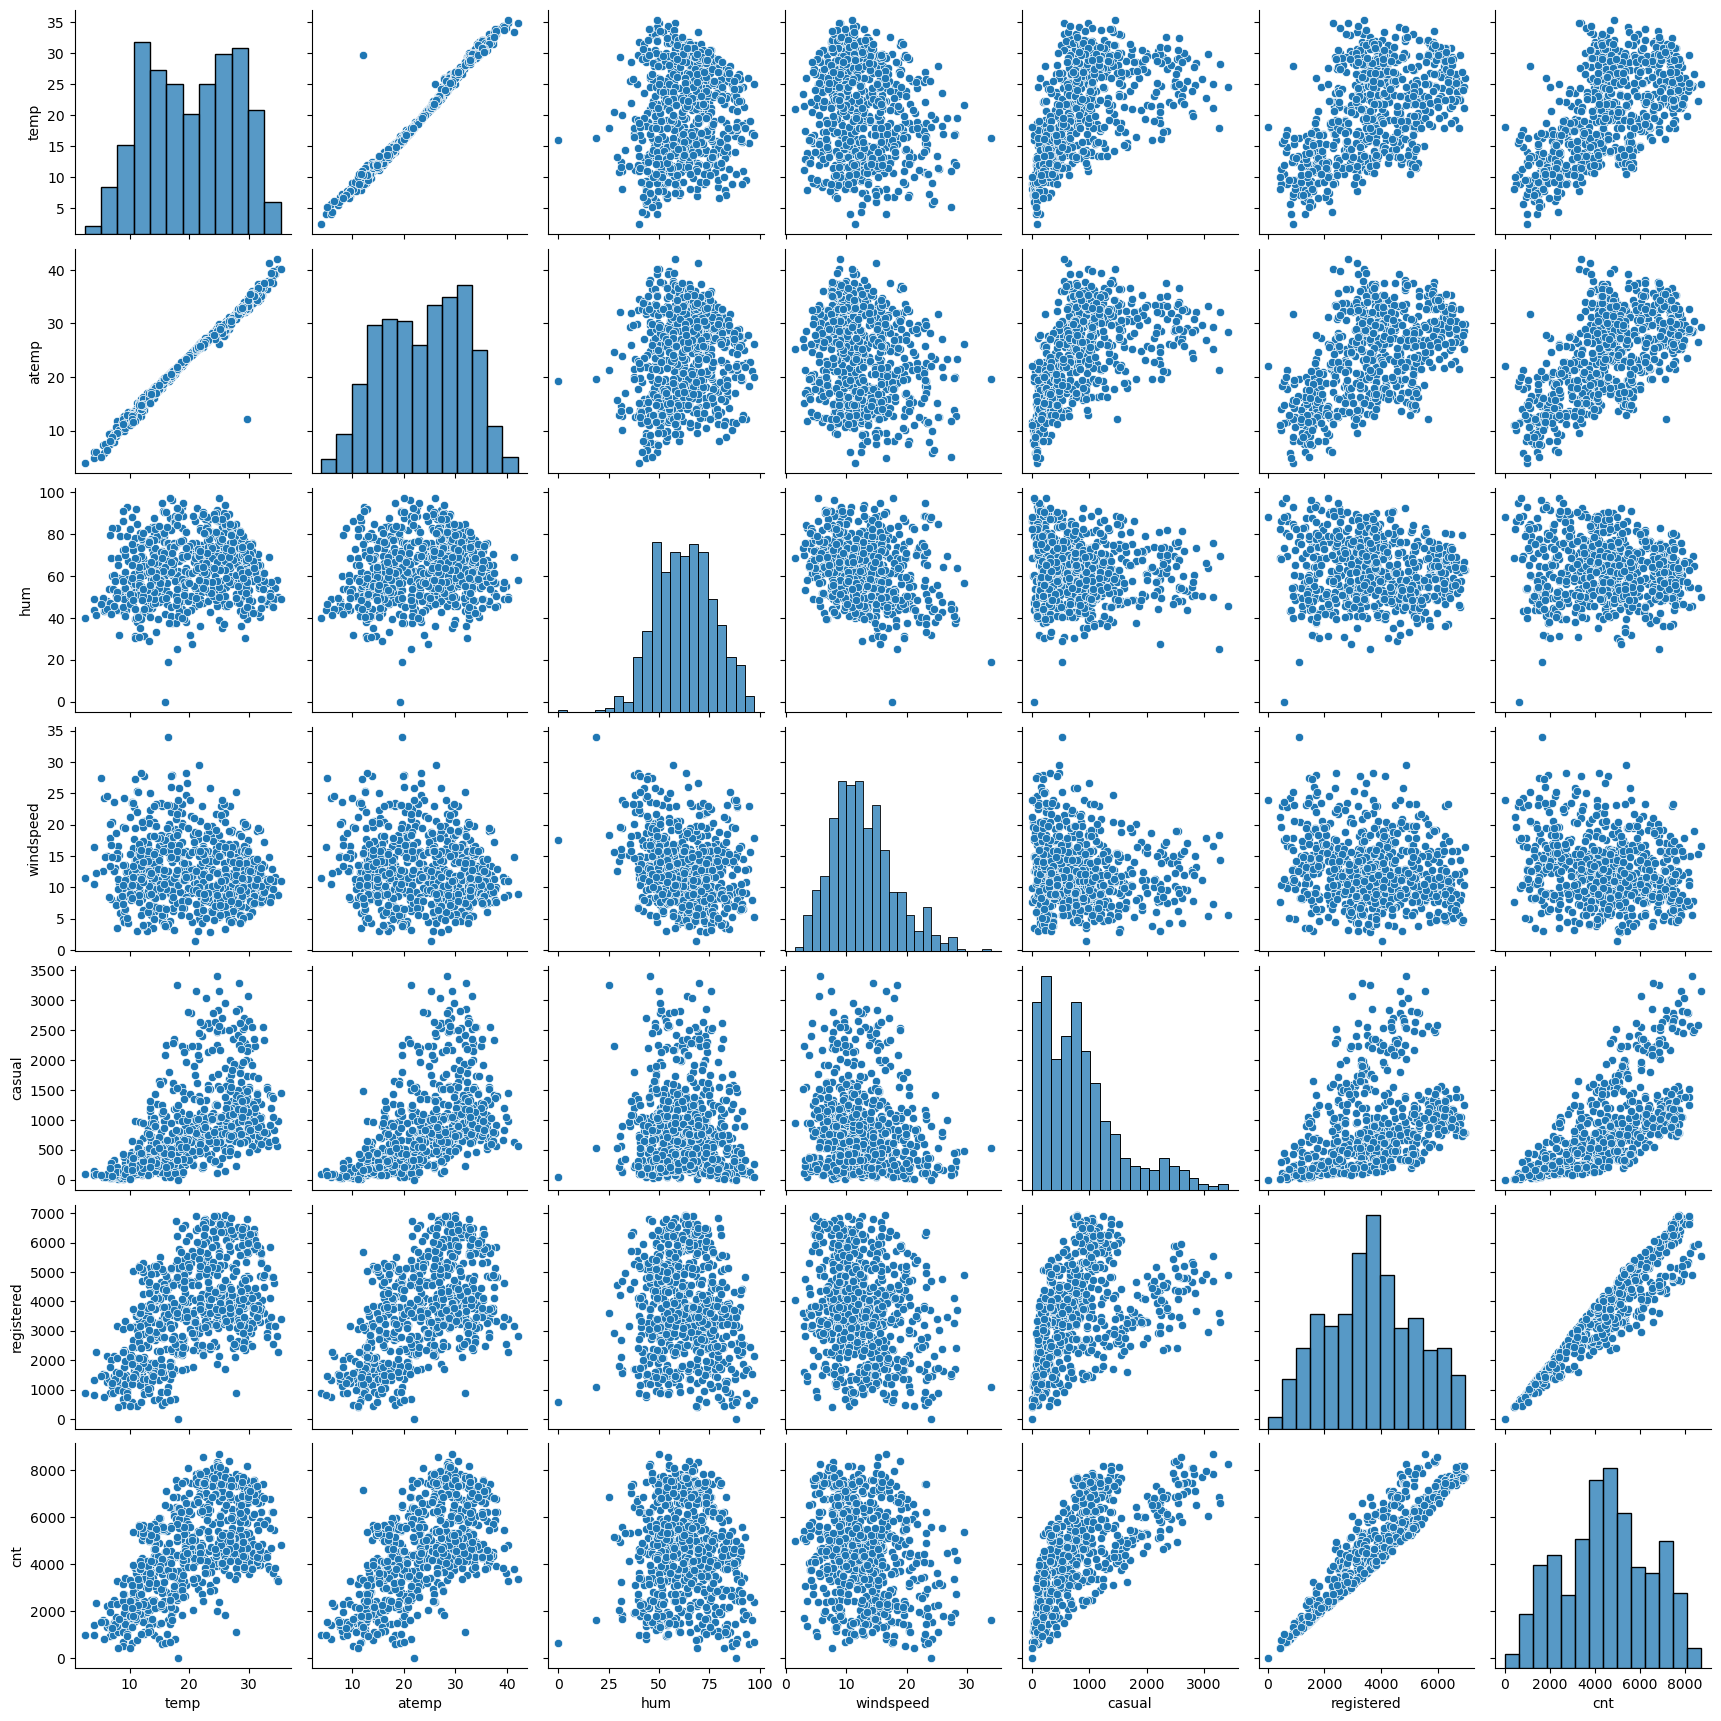

In [8]:
sns.pairplot(bikesharing[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
#plt.show()

In [9]:
# Whether we should go for linear regression?
# YES. because some numerical variables seems to have a positive realtion like cnt vs temp, cnt vs atemp, cnt vs hum,cnt vs windspeed, cnt vs hum etc

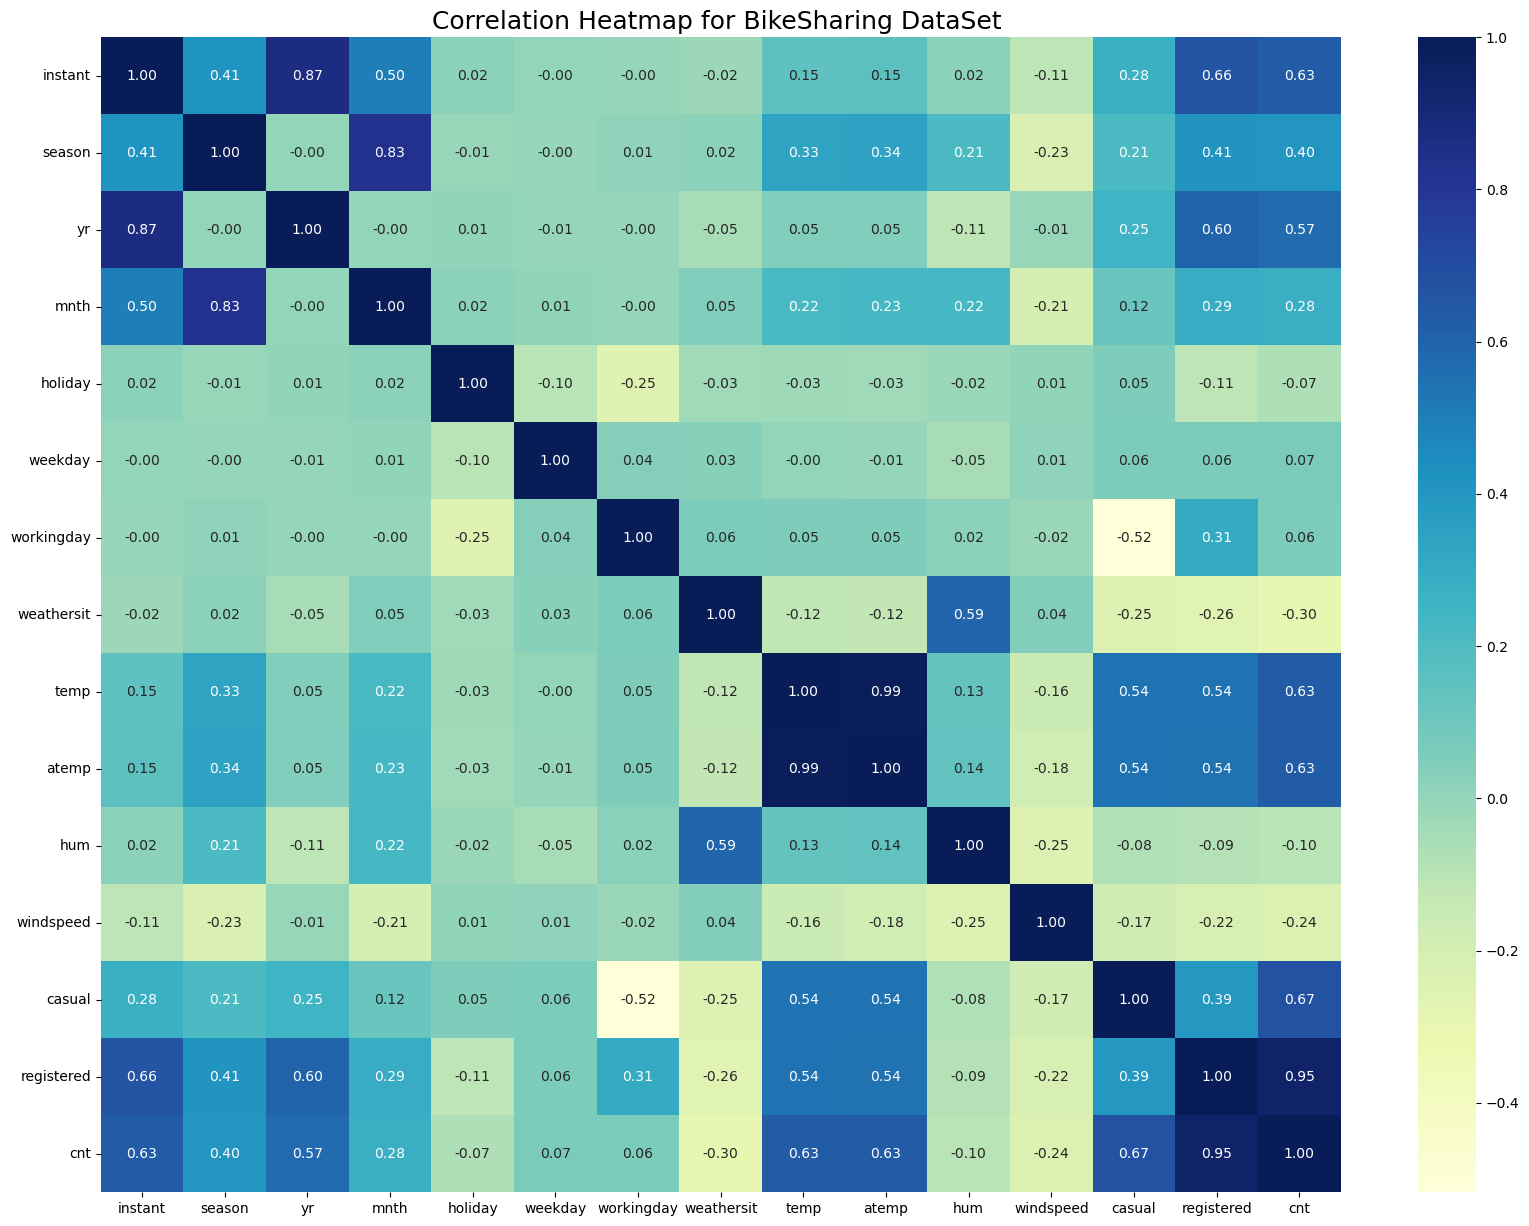

In [10]:
# heatmap df_train

plt.figure(figsize = (20,15))
sns.heatmap(bikesharing.corr(numeric_only=True), annot = True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation Heatmap for BikeSharing DataSet ',fontsize = 18)
plt.show()



####  2.2.Visualising the categorical Data

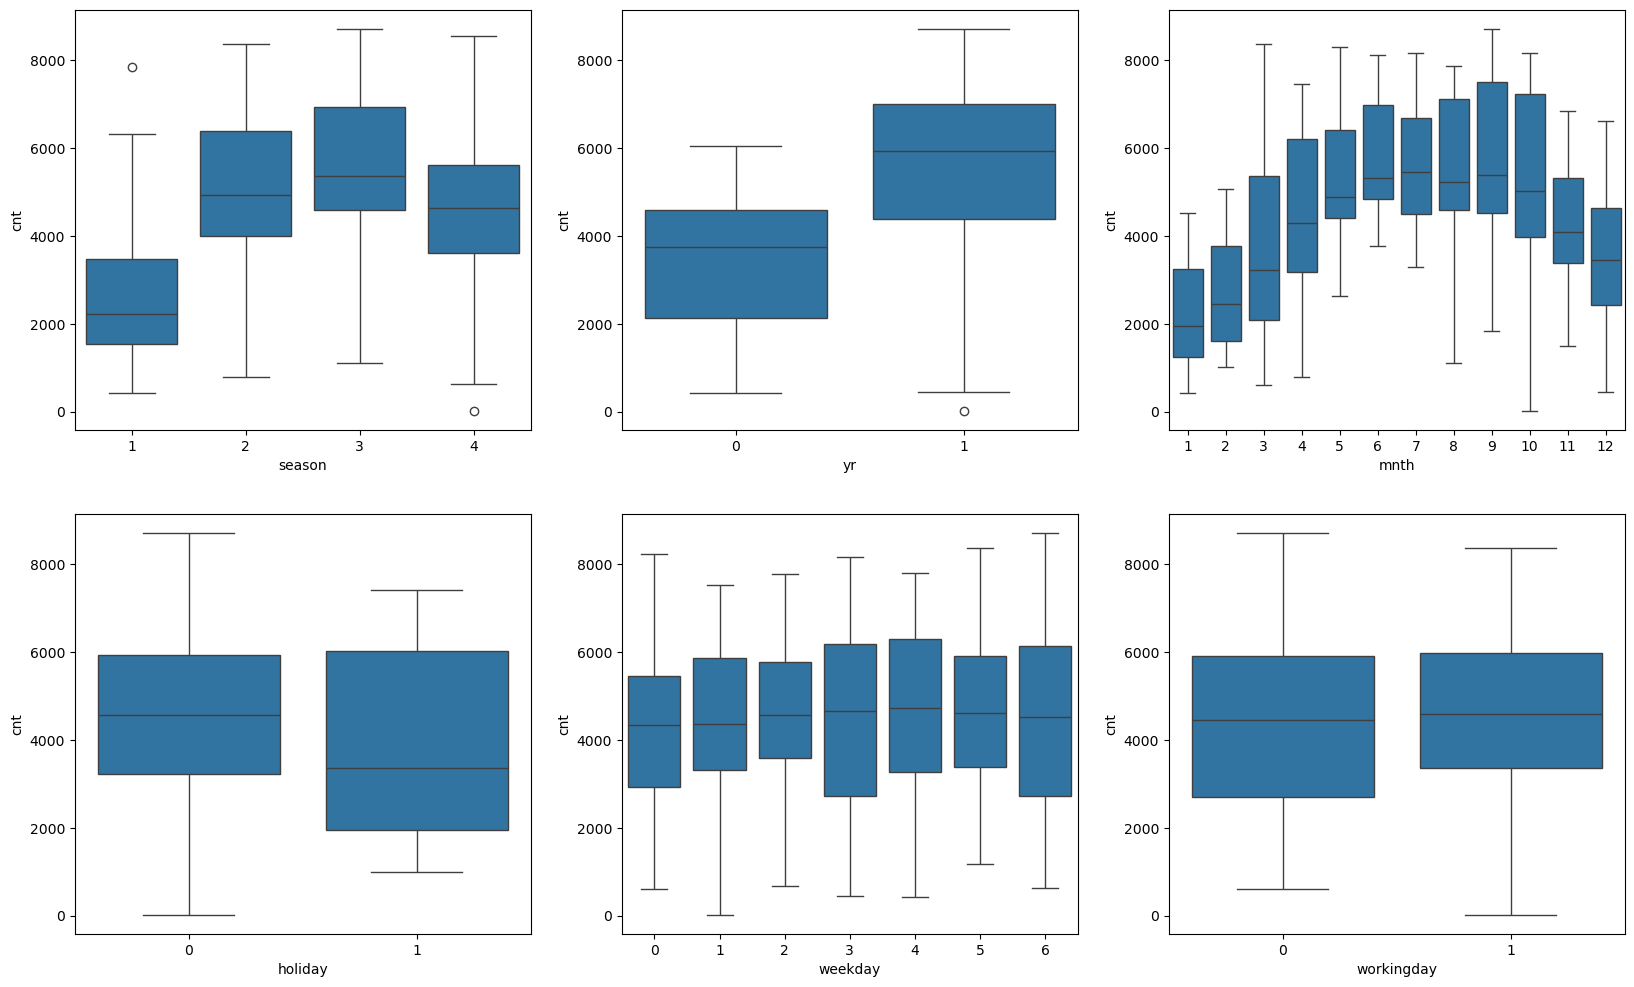

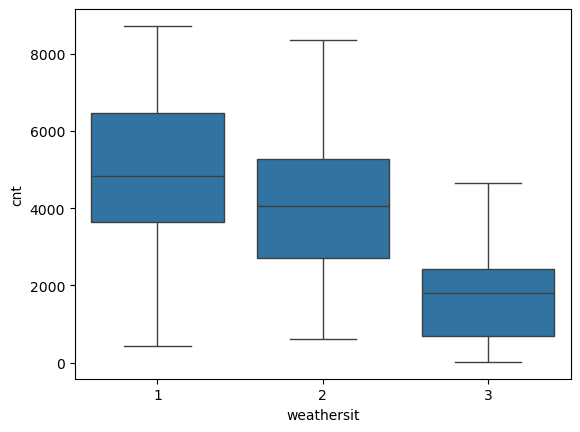

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.show()
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()

Inferences from Plot:

1. 'season' - Fall (3) has highest demand for bike sharing
2. 'yr' - Demand for rental bikes is higher in 2019 compared to 2018
3. 'mnth' - Demand is continuously increaing each month from Jan-Jun. September has the highest demand. Sep to Dec, demand decreasing.
           Start of year and End of year, demand seems to be less. It may be because of extreme weather conditions. 
4. 'holiday' - On holidays, demand is less. 
5. ' Weekday' - Demand is almost alike 
6. 'workingday' - Demand on working day & non- working is almost similar
7. 'weathesit' - Highest demand on days with Clear weather. Lowest demand when there is light snow or light rain.


### STEP 3 - Preparing the Data

#### 3.1. Filling /Imputing Missing values 

<b>-  Not needed in this dataset as there are no missing values

#### 3.2 . Dropping Columns which are Not Relevant for analysis

- instant -  it is a row index. Not required for the analysis                         

- dteday  -  It is date. It can be removed as we have data for day,month and year seperately. 


- casual  -  Contains count of casual users 
- registered - Contains count of registered users

Note :The Target Variable 'cnt' is sum of casual and registered . Hence,We can drop both these variables - casual, registered

<b> - Dropping variables -'instant', 'dteday', 'casual','registered'

In [12]:
# Dropping 'instant', 'dteday', 'casual','registered'

bikesharing =bikesharing.drop(columns=['instant','dteday','casual','registered'], axis = 1)


bikesharing


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


<b> - Dropping 'atemp' because 'atemp' and 'temp' are highly correlated as seen in heatmap . So we can drop one of them 

In [13]:
# atemp and temp are highly correlated . So we can drop atemp
bikesharing =bikesharing.drop(columns=['atemp'], axis = 1)
bikesharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


#### 3.3.Creating Dummy variables for categorical variables (with more than 2 levels)

<b> - Creating dummy variables for 'season' variable

In [14]:
#  Variable 'season' is a categorical variable with values 1- Spring, 2-Summer, 3-Fall, 4-Winter
#  N=4 values . Therefore N-1 = 3 dummy variables


# creating dummy variables 
season_val = pd.get_dummies(bikesharing['season'],dtype=int, drop_first= True) 

# spring - 000 # drop first -spring
# summer - 100 
# fall   - 010 
# winter - 001 

season_val.head()


,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [15]:
season_val.rename(columns={1:"Spring",2:"Summer", 3:"Fall", 4:"Winter"},inplace=True)

In [16]:
# concat the dummy dataframe with original dataframe
bikesharing = pd.concat([bikesharing , season_val],axis=1)
bikesharing


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Summer,Fall,Winter
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114,0,0,0
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095,0,0,0
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341,0,0,0
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796,0,0,0


In [17]:
# drop  Variable 'season' and first dummy variable 'Spring
bikesharing = bikesharing.drop('season', axis = 1)
bikesharing


,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Summer,Fall,Winter
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114,0,0,0
726,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095,0,0,0
727,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341,0,0,0
728,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796,0,0,0


<b>- Create dummy variables fior 'weathersit' variable
  

In [18]:
#  Variable 'weathersit' is a categorical variable with values 1:"Clear", 2:"Misty", 3: "Light_Rain_Snow", 4:"Heavy_Rain_Snow"
#  N=4 values . Therefore N-1 = 3 dummy variables

# We create dummy variables and drop the first dummy variable  
weather_val = pd.get_dummies(bikesharing['weathersit'],dtype=int)
weather_val.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


 - Note - No data available for Heavy Rain/Snow

In [19]:
weather_val.rename(columns={1:"Clear", 2:"Misty", 3: "Light_Rain_Snow", 4:"Heavy_Rain_Snow"},inplace=True)
weather_val.head()

,Clear,Misty,Light_Rain_Snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
# concat the dummy dataframe with original 
bikesharing = pd.concat([bikesharing , weather_val],axis=1)

# drop  Variable 'weathersit' 
bikesharing = bikesharing.drop('weathersit', axis = 1)

In [21]:
bikesharing

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,Clear,Misty,Light_Rain_Snow
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,0,0,0,1,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,1,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,4,1,10.420847,65.2917,23.458911,2114,0,0,0,0,1,0
726,1,12,0,5,1,10.386653,59.0000,10.416557,3095,0,0,0,0,1,0
727,1,12,0,6,0,10.386653,75.2917,8.333661,1341,0,0,0,0,1,0
728,1,12,0,0,0,10.489153,48.3333,23.500518,1796,0,0,0,1,0,0


<b> - Create dummy variables for 'weekday' 

In [22]:
# creating dummy variables 
weekday_val = pd.get_dummies(bikesharing['weekday'],dtype=int,drop_first= True )
weekday_val.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [23]:
# renaming the dummy variables
weekday_val.rename(columns={ 1:"Mon", 2: "Tue", 3:"Wed", 4:"Thurs", 5:"Fri", 6 :"Sat" },inplace=True)

In [24]:
# concat the dummy dataframe with original 
bikesharing = pd.concat([bikesharing , weekday_val],axis=1)


In [25]:
bikesharing

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,Summer,...,Winter,Clear,Misty,Light_Rain_Snow,Mon,Tue,Wed,Thurs,Fri,Sat
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,0,...,0,1,0,0,0,1,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,4,1,10.420847,65.2917,23.458911,2114,0,...,0,0,1,0,0,0,0,1,0,0
726,1,12,0,5,1,10.386653,59.0000,10.416557,3095,0,...,0,0,1,0,0,0,0,0,1,0
727,1,12,0,6,0,10.386653,75.2917,8.333661,1341,0,...,0,0,1,0,0,0,0,0,0,1
728,1,12,0,0,0,10.489153,48.3333,23.500518,1796,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
# Dropping column 'weekday' as the first dummy variable 'Sunday' 
bikesharing = bikesharing.drop('weekday', axis = 1)

bikesharing

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,Clear,Misty,Light_Rain_Snow,Mon,Tue,Wed,Thurs,Fri,Sat
0,0,1,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,1,10.420847,65.2917,23.458911,2114,0,0,0,0,1,0,0,0,0,1,0,0
726,1,12,0,1,10.386653,59.0000,10.416557,3095,0,0,0,0,1,0,0,0,0,0,1,0
727,1,12,0,0,10.386653,75.2917,8.333661,1341,0,0,0,0,1,0,0,0,0,0,0,1
728,1,12,0,0,10.489153,48.3333,23.500518,1796,0,0,0,1,0,0,0,0,0,0,0,0


<b> - Creating dummy variables for 'mnth'

In [27]:
# creating dummy variables for mnth
month_val = pd.get_dummies(bikesharing['mnth'],dtype=int,drop_first= True )
month_val.head()



,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# renaming the dummy variables
month_val.rename(columns={ 2: "Feb", 3:"Mar", 4:"Apr", 5:"May", 6 :"Jun" , 7: "Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11 :"Nov",12 :"Dec"},inplace=True)

In [29]:
# concat the dummy dataframe with original 
bikesharing = pd.concat([bikesharing , month_val],axis=1)
bikesharing

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,1,0,0,14.110847,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,14.902598,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,8.050924,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,8.200000,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,9.305237,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,1,10.420847,65.2917,23.458911,2114,0,0,...,0,0,0,0,0,0,0,0,0,1
726,1,12,0,1,10.386653,59.0000,10.416557,3095,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,12,0,0,10.386653,75.2917,8.333661,1341,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,12,0,0,10.489153,48.3333,23.500518,1796,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# Dropping column 'mnth' 
bikesharing = bikesharing.drop('mnth', axis = 1)
bikesharing

,yr,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,0,0,0,...,0,0,0,0,0,0,0,0,0,1
726,1,0,1,10.386653,59.0000,10.416557,3095,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### 3.4. Split Data into Testing Data and Training Data

In [31]:
# Splitting Train and Test data

df_train,df_test = train_test_split(bikesharing, train_size=0.7,random_state=100)



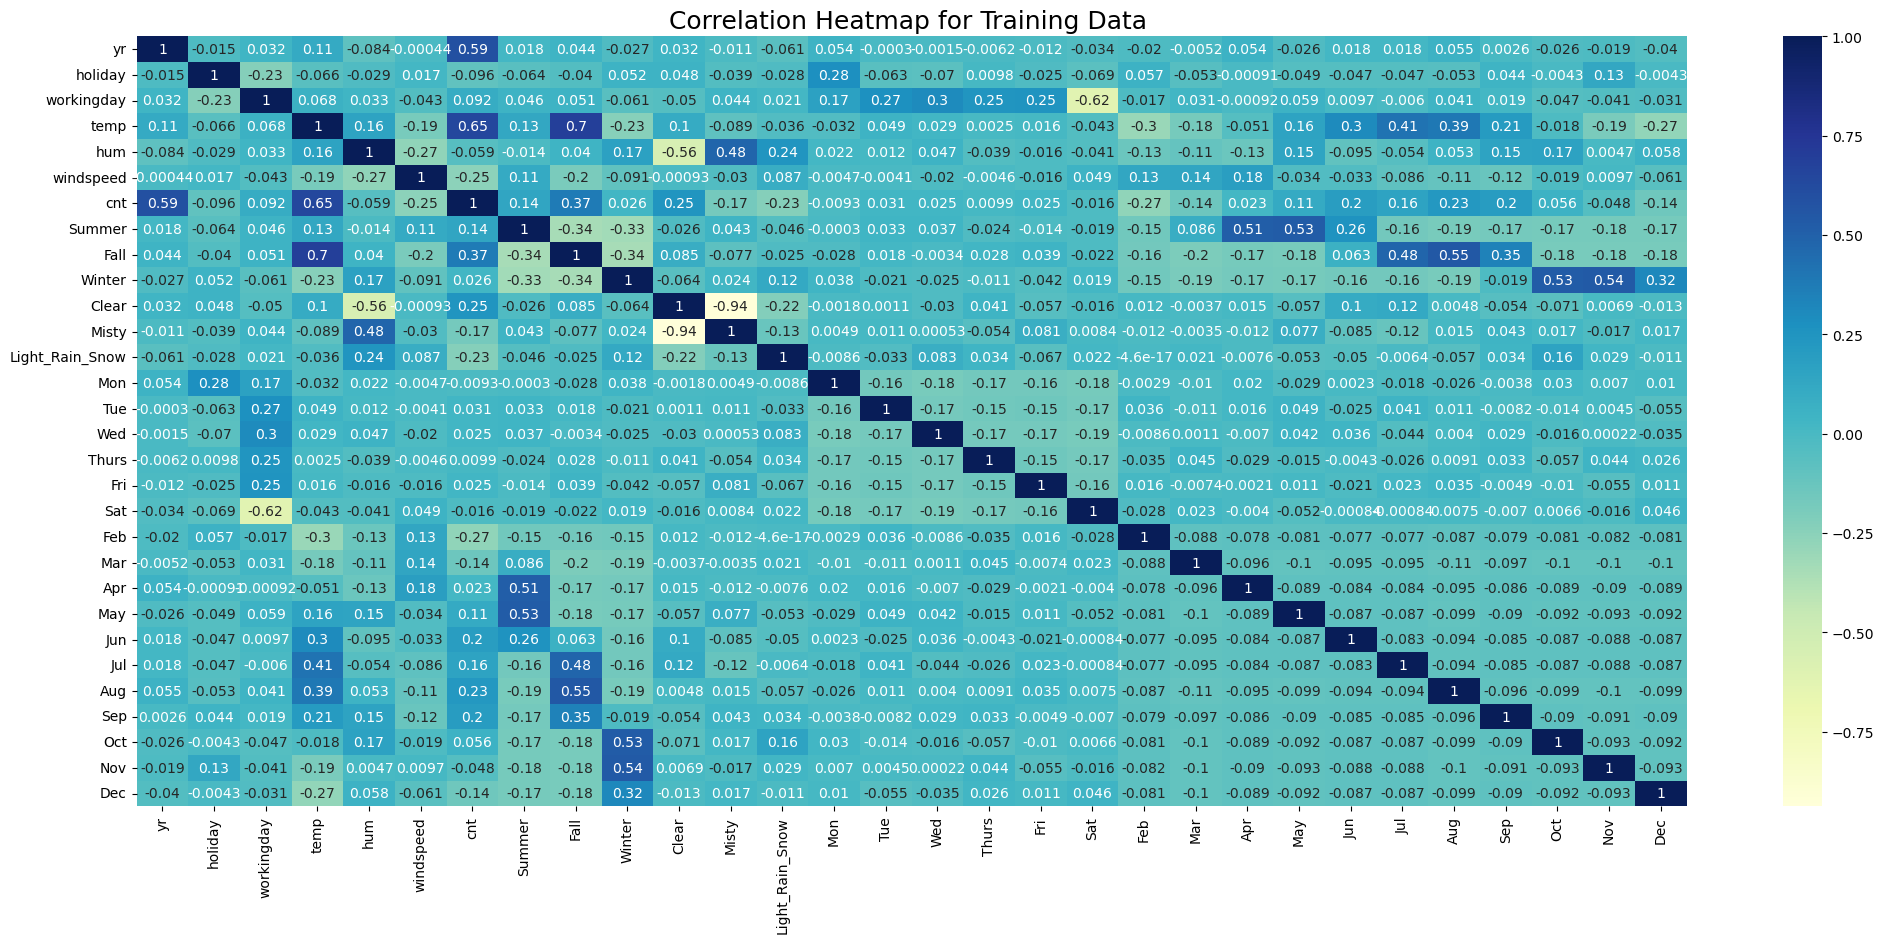

In [32]:
# Plotting heatmap for df_train

#plt.figure(figsize = (25, 15))
plt.figure(figsize = (25, 10))
sns.heatmap(df_train.corr(numeric_only = True), annot = True, cmap="YlGnBu")
plt.title('Correlation Heatmap for Training Data ',fontsize = 18)
plt.show()

#### 3.5. Rescaling of Variables - Using MinMax Scaler

In [33]:
 #Instantiate an object

scaler = MinMaxScaler()

# Create a list of numerical variables 
#num_vars = ['temp','hum', 'windspeed']

num_vars = ['temp', 'hum', 'windspeed', 'cnt']
# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

#scaler.fit(df_train[num_vars])  # Fit the scaler
df_train.head()



,yr,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,...,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,...,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### STEP 4 - Build and Train Model Using RFE

In [35]:
# X_train, Y_train

Y_train = df_train.pop('cnt')
X_train = df_train


In [36]:
# Running RFE with the output number of variables equal to 15

lm = LinearRegression()
lm.fit( X_train, Y_train)

rfe = RFE(lm, n_features_to_select=15) # running RFE
rfe = rfe.fit(X_train, Y_train)

In [37]:
# Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Summer', True, 1),
 ('Fall', False, 2),
 ('Winter', True, 1),
 ('Clear', True, 1),
 ('Misty', True, 1),
 ('Light_Rain_Snow', True, 1),
 ('Mon', False, 11),
 ('Tue', False, 12),
 ('Wed', False, 14),
 ('Thurs', False, 15),
 ('Fri', False, 13),
 ('Sat', True, 1),
 ('Feb', False, 7),
 ('Mar', False, 3),
 ('Apr', False, 5),
 ('May', False, 4),
 ('Jun', False, 6),
 ('Jul', False, 8),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 10)]

In [38]:
# all features with ranking 1
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Summer',
       'Winter', 'Clear', 'Misty', 'Light_Rain_Snow', 'Sat', 'Aug', 'Sep',
       'Oct'],
      dtype='object')

In [39]:
# other features not considered for RFE
X_train.columns[~rfe.support_]


Index(['Fall', 'Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Nov', 'Dec'],
      dtype='object')

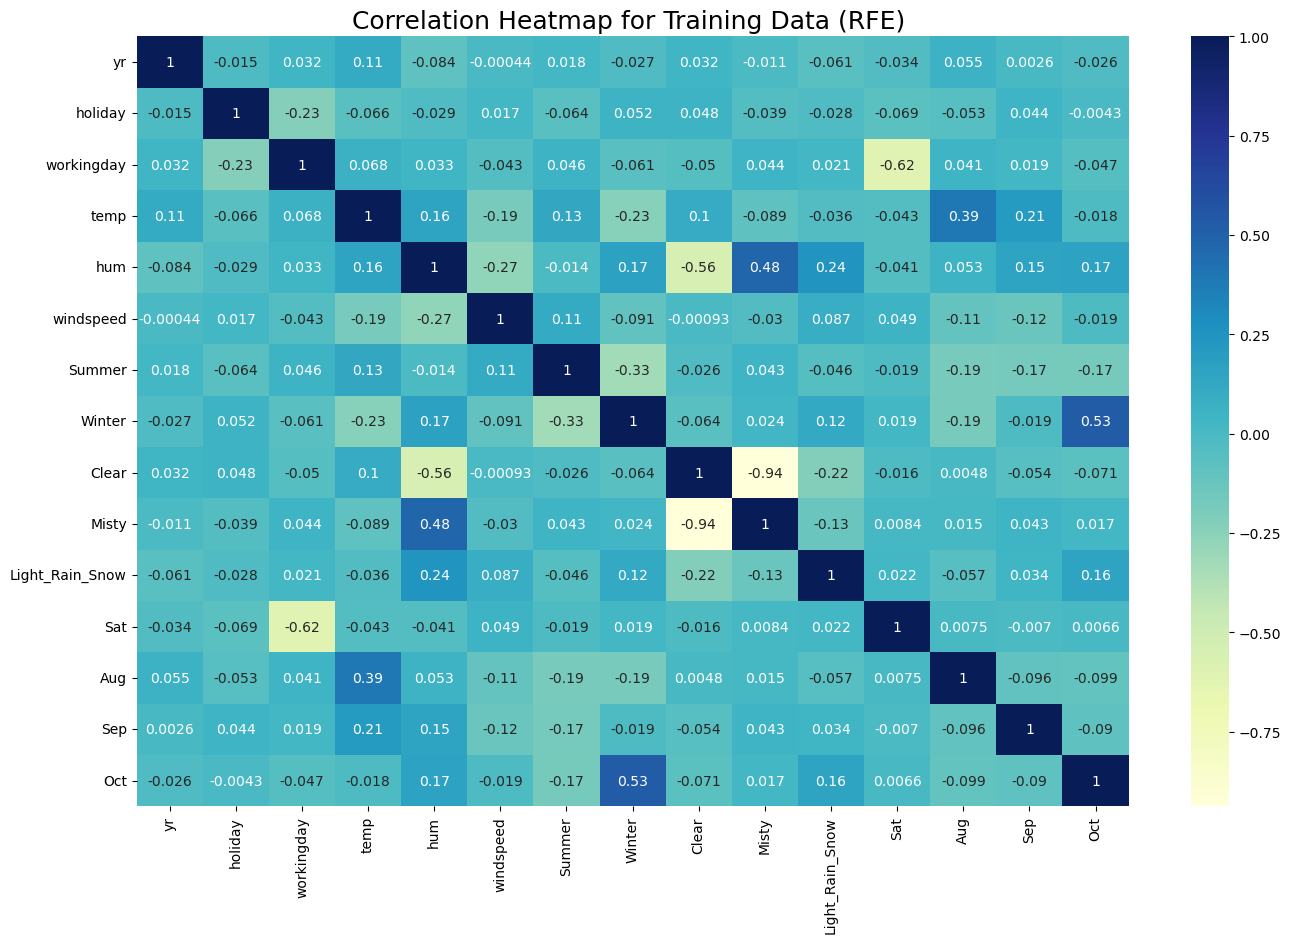

In [40]:
# Plotting heatmap for features selected by RFE

#plt.figure(figsize = (25, 15))
plt.figure(figsize = (16, 10))
sns.heatmap( X_train[col].corr(numeric_only = True), annot = True, cmap="YlGnBu")
plt.title('Correlation Heatmap for Training Data (RFE) ',fontsize = 18)
plt.show()

In [41]:
# Defining the Build model Function
def Build_model(x_train, y_train):
   
    X_train_sm = sm.add_constant(x_train)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return { 'model' : lm, 'X_train_sm' : X_train_sm }

In [42]:
# Defining the VIF Calculation function
def Calculate_VIF(X):
   
   # X = x_train.drop(['const'], axis=1)
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#### Model 1

In [43]:
X_train_1 = X_train[col]

# Build model 
lm1 = Build_model(X_train_1, Y_train)

# Calculate the VIFs for the new model
Calculate_VIF(X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          8.70e-192
Time:                        14:57:58   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0701      0.025     

### Observation :
variable 'Clear' has high VIF = 33.45
we will drop this variable and rebuild the model again

#### Model 2

In [44]:
X_train_2 = X_train_1.drop(['Clear'], axis = 1)

# Build model 
lm2 = Build_model(X_train_2, Y_train)

# Calculate the VIFs for the new model
Calculate_VIF(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          8.70e-192
Time:                        14:57:58   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1948      0.029     

Observation : variable 'hum' has high VIF = 16.57.  we will drop this variable and rebuild the model again

#### Model 3

In [45]:
X_train_3 = X_train_2.drop(['hum'], axis = 1)

# Build model 
lm3 = Build_model(X_train_3, Y_train)

# Calculate the VIFs for the new model
Calculate_VIF(X_train_3)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.97e-188
Time:                        14:57:58   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0937      0.019     

Observation : variable 'holiday' has high p_value = 0.049 we will drop this variable and rebuild the model again

#### Model 4

In [46]:
X_train_4 = X_train_3.drop(['holiday'], axis = 1)

# Build model 
lm4 = Build_model(X_train_4, Y_train)

# Calculate the VIFs for the new model
Calculate_VIF(X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          9.00e-189
Time:                        14:57:58   Log-Likelihood:                 505.77
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     497   BIC:                            -930.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0848      0.019     

Observation : variable Oct has slightly high p_value = 0.044 we will drop this variable and rebuild the model again

#### Model 5

In [47]:
X_train_5 = X_train_4.drop(['Oct'], axis = 1)

# Build model 
lm5 = Build_model(X_train_5, Y_train)

# Calculate the VIFs for the new model
Calculate_VIF(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          4.31e-189
Time:                        14:57:58   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0809      0.019     

Observation : Aug has high correlation with temp . p_value=0.002.  we will drop this variable and rebuild the model again

#### Model 6

In [48]:
X_train_6 = X_train_5.drop(['Aug'], axis = 1)

# Build model 
lm6 = Build_model(X_train_6, Y_train)

# Calculate the VIFs for the new model
Calculate_VIF(X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          3.13e-188
Time:                        14:57:58   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0750      0.019     

## <b>Observation:
- <b>Adjusted R-squared =83.2 % Which is very good. Overall model fit is good.
- <b>All the p-values are < 0.05 and significantly small , which means all the variables used for training the model are significant
- <b>All VIF values are <5. No multicollinearity 
  
<b>Therefore, This will be the final model.

### STEP 5 - Residual Analysis

In [49]:
# Read the final model values 
final_model, X_train_new = lm6.values() 


#### 5.1. Calculate Residual = Y_predicted - Y_actual for training data 

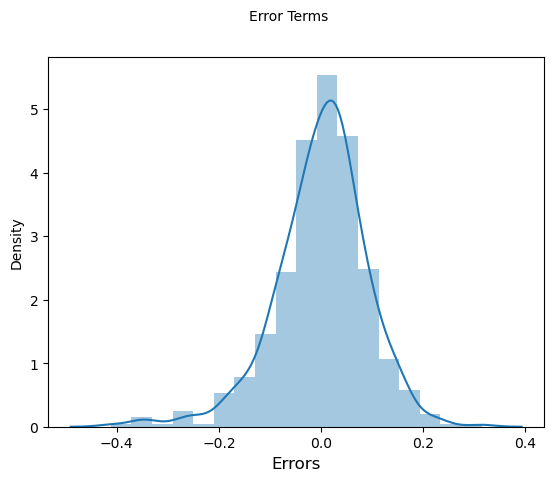

In [50]:
# predict Y_train 
Y_train_pred = final_model.predict(X_train_new)

# calculate residual
residual = Y_train - Y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 18, kde = True)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)                         # X-label
plt.show()

In [51]:
# Calculate MSE, RMSE for the multiple linear regression model
mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = np.sqrt(mse_train)

print(f'RMSE for multiple linear regression: {mse_train}')
print(f'MSE for multiple linear regression: {rmse_train}')

RMSE for multiple linear regression: 0.008280063298015203
MSE for multiple linear regression: 0.09099485314024747


#### 5.2. Visualize the Linear regression fit line on Training set

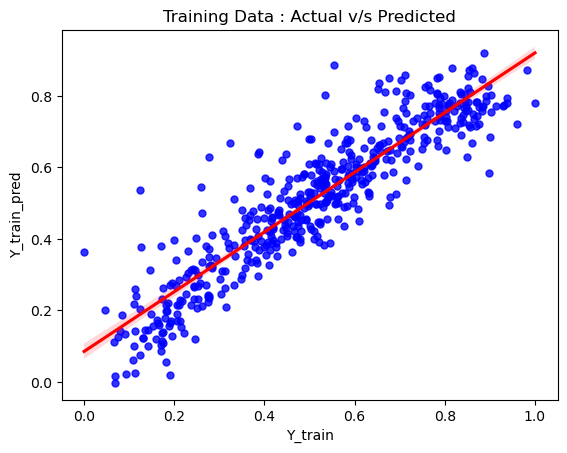

In [52]:
# Visualize the trained model using a scatter plot with a linear regression fit line

sns.regplot(x = Y_train, y = Y_train_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('Training Data : Actual v/s Predicted')
plt.xlabel('Y_train')
plt.ylabel('Y_train_pred') 
plt.show()

<b>Observation :
- <b>For Training data, Scatter Plot between Actual and Predicted values shows linear relationship
- <b>The Line shows a perfect fit for the data


#### 5.3. Visualize Residuals vs Predicted values for Training data

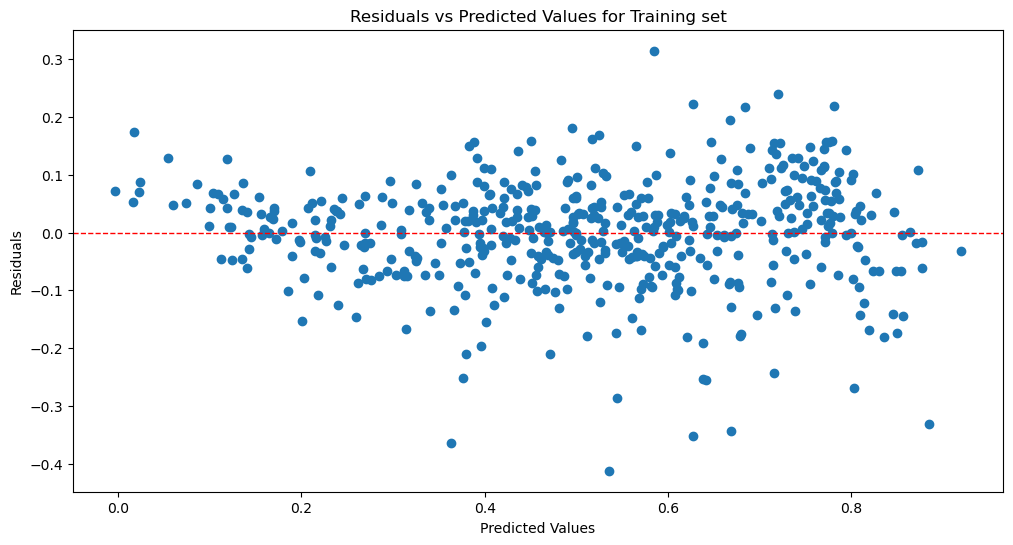

In [53]:
# Residual vs Predicted 
plt.figure(figsize=(12,6))
plt.scatter(Y_train_pred, residual)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')#plt.axhline(0, linestyle='-', color='red')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=1,linestyle='--', color='red')
plt.title('Residuals vs Predicted Values for Training set')
plt.show()  # Make sure this is included

Observation :

For Training data, Scatter Plot between Residual and Predicted values shows no specific pattern. Explains Homoscedasticity- error terms have constant variance

### STEP  6 - Prediction and Evaluation of the Model on Test Data

#### 6.1. Applying scaling on test sets

In [54]:
# Scaling the Test data ( Only transform) 

num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])



In [55]:
# Dividing into X_test and y_test

Y_test = df_test.pop('cnt')
X_test = df_test

#### 6.2. Predicting test data using the Model

In [56]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'Summer', 'Winter',
       'Misty', 'Light_Rain_Snow', 'Sat', 'Sep'],
      dtype='object')

In [57]:
# Now let's use our model to make predictions on test data.


X_train_1 = X_train_new.drop(['const'], axis=1)
#X_train_sm

# Creating X_test_new dataframe by Keeping only variabales in X_train of final model
X_test_new = X_test[X_train_1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
Y_test_pred = final_model.predict(X_test_new)



#### 6.3.Evaluating the Model 

In [58]:
# evaluate 

# calculate R-sqaured value and adjusted R-squared value for training data
R_squared_train  = r2_score( y_true =Y_train, y_pred =Y_train_pred)
print(" R-squared value for Training data ", R_squared_train)

n = len(Y_train) # no of samples in training set
p = X_train_new.shape[1] # no of predictors in training set
adjusted_R_squared_train = 1 - ((1 - R_squared_train) * (n - 1) / (n - p - 1))
print(" Adjusted R-squared value for Training data ", adjusted_R_squared_train)

# calculate R-sqaured value and adjusted R-squared value for testing data

R_squared_test = r2_score ( y_true = Y_test, y_pred = Y_test_pred)
print(" R-squared value for Testing data ", R_squared_test)


n = len(Y_test) # no of samples in testing set 
adjusted_R_squared_test = 1 - ((1 - R_squared_test) * (n - 1) / (n - p - 1))

print(" Adjusted R-squared value for Testing data ", adjusted_R_squared_test)

 R-squared value for Training data  0.8352749595695672
 Adjusted R-squared value for Training data  0.8316364546604612
 R-squared value for Testing data  0.7961390438459763
 Adjusted R-squared value for Testing data  0.7853579355878308


###### Observation :

<b> For Training data:

<b>      --R-squared value = 83.5%  - indicates 83.5% of variance in training data is explained 

<b>      --Adjusted R_squared = 83.2% ( which is a good score)
                         
<b> For Testing data:

<b>     -- R-squared value = 79.6% - indicates 79.6 of variance in testing data is explained. 
<b>        Though it is slightly lesser that R-squared value of trainig data, it is a good value indicating good prediction.  
                        
<b>     -- Adjusted R_squared = 78.5% ( which is a good score)                         

- <b>R-squared values for both training and testing are high, indicating that the model fits well with the training data and is able to generalise well to test data.
- <b>The accuracy of the model ( difference between R-squared of test and train data) is 4.6 % which is a good and acceptable value.



#### 6.4. Visualize the Linear regression fit line on Test set

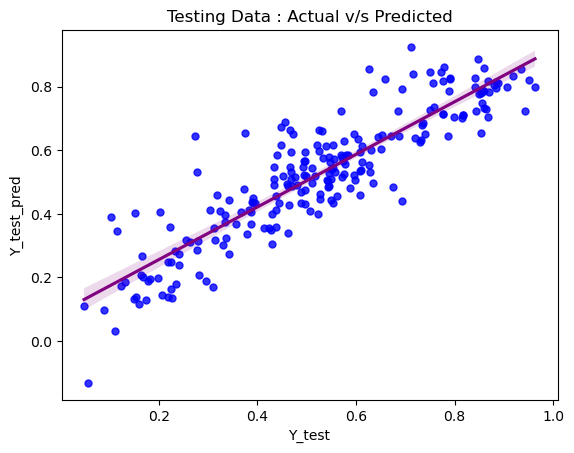

In [59]:
# Visualize the model linear regression fit line on test data

sns.regplot(x = Y_test, y = Y_test_pred, line_kws = { 'color': 'purple' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('Testing Data : Actual v/s Predicted')
plt.xlabel('Y_test')
plt.ylabel('Y_test_pred') 
plt.show()

In [60]:
### 4.1. Visualize Residuals vs Predicted values

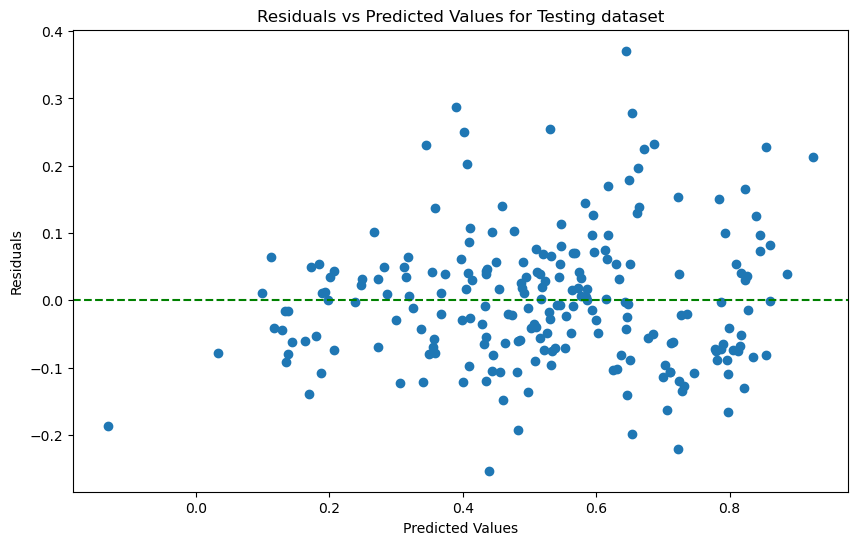

In [61]:
# Residual vs Predicted 
plt.figure(figsize=(10,6))
plt.scatter(Y_test_pred, Y_test_pred-Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')#plt.axhline(0, linestyle='-', color='red')
plt.axhline(y = 0, color ="green", linestyle ="--")
plt.title('Residuals vs Predicted Values for Testing dataset')
plt.show()  # Make sure this is included

Text(0, 0.5, 'Y_test_pred')

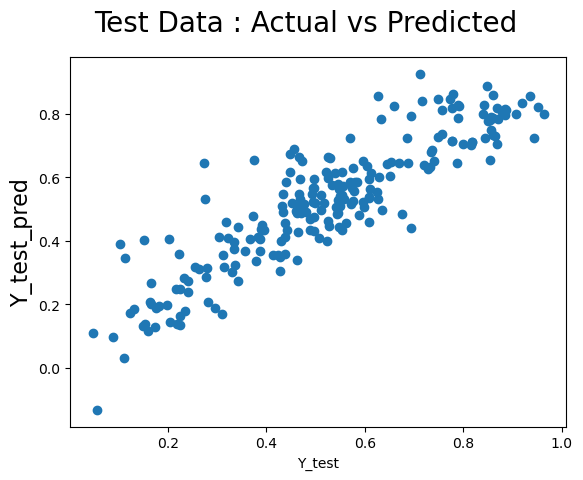

In [62]:
# Plotting Y_test and Y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,Y_test_pred)
fig.suptitle('Test Data : Actual vs Predicted ', fontsize=20)              # Plot heading 
plt.xlabel('Y_test', fontsize=10)                          # X-label
plt.ylabel('Y_test_pred', fontsize=16)                          # Y-label

In [63]:
### 5.5. Visualize Residuals vs Predicted values

#### 6.5. Mean square error calculation 

In [64]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(Y_train, Y_train_pred)

mse_test = mean_squared_error(Y_test, Y_test_pred)

print("Mean square Error for train data :", mse_train)
print("Mean square Error for test data :", mse_test)

Mean square Error for train data : 0.008280063298015203
Mean square Error for test data : 0.009747464738207473


In [65]:
# Reading coeff values from the final model

CoEff = round(final_model.params,2)
CoEff.sort_values(ascending = False)


temp               0.55
yr                 0.23
Winter             0.13
Sep                0.10
Summer             0.09
const              0.08
Sat                0.07
workingday         0.06
Misty             -0.08
windspeed         -0.16
Light_Rain_Snow   -0.29
dtype: float64

##### CONCLUSION:

<b>- Multiple Linear Regression Equation:

<b>cnt = 0.08 + (0.55 * temp) + (0.23 * yr) + (0.13 * Winter) + (0.10 * Sep) + (0.09 * Summer) + (0.07 * Saturday) + (0.06 * workingday) 
      - (0.08 * Misty) - (0.16 * windspeed) - (0.29 * Light_Rain_Snow)  

<b>- Positive coefficients are temp, yr, Winter , Sep, Summer, Saturday, Workinday
<b>- Negative coefficients are Misty, Windspeed,LIght_Rain_Snow

<b>- Temp is most significant feature , indicating that warmer temperatures likely lead to higher demands for rental bikes.    
<b>- Summer and Winter have moderate impact on demand of bikes.
     Winter has more demand of bikes than Summer. Summer and Winter has more demand for bikes compared to the Fall and Spring. 

<b>- Weather conditions list Misty or Light rain or Snow, Windy day reduces the demand for bikes.                                 
                                 
<b>- Month of September has a moderate positive impact on demand for rental bikes. September seemsto have higher usage of rental bikes compared to other months.

<b>- Year by year also the demand is expected to grow.
<b>- Saturdays and Working days are also expected to have slightly higher demand of rental bikes compared to holidays.

<b> R-squared value of the train set = 83.5%
<b> Adjusted R-squared value of the train set = 83.1%
   
<b> R-squared value of the test set =79.6%
<b> Adjusted R-squared value of the test set = 78.5%

<b>- The R-squared value of the train set is 83.5% and for the test set is 80%.This indicates that the model explains the variance quite accurately on the test set. Thus we can conclude that it is a good model.


<b> - Mean Square Error of train data= 0.008
<b>   Mean Square Error of train data =0.009  
<b>-   Both MSE s are almost 0. Indicates that variance is accurately predicted on the test set

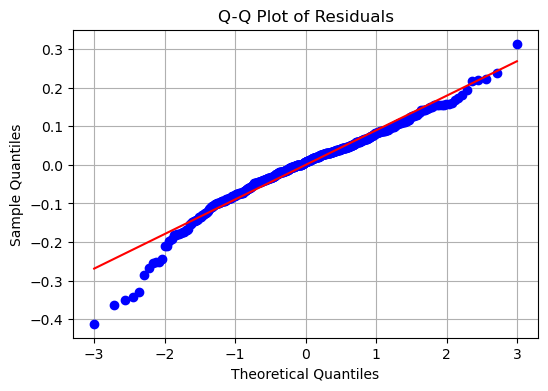

In [66]:
# Plot the Q-Q plot to graphically check for the hypothesis
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
plt.figure(figsize=(6, 4))
stats.probplot(residual, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()